In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)
x_train=x_train/255.0
x_test=x_test/255.0
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy is", test_acc)
predictions = model.predict(x_test[:10])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.3809 - loss: 1.6782 - val_accuracy: 0.5945 - val_loss: 1.1301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6036 - loss: 1.1134 - val_accuracy: 0.6331 - val_loss: 1.0183
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.6779 - loss: 0.9159 - val_accuracy: 0.6585 - val_loss: 0.9735
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7209 - loss: 0.7916 - val_accuracy: 0.6986 - val_loss: 0.8744
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7588 - loss: 0.6859 - val_accuracy: 0.7069 - val_loss: 0.8599
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.7873 - loss: 0.6147 - val_accuracy: 0.7255 - val_loss: 0.8108
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.8092 - loss: 0.5470 - val_accuracy: 0.7165 - val_loss: 0.8604
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 55ms/step - accuracy: 0.8370 -

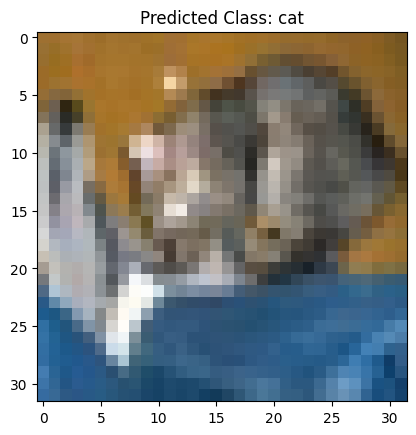

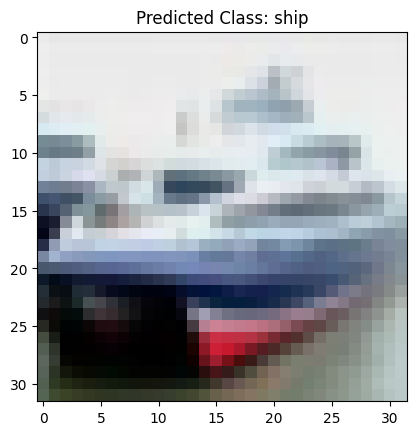

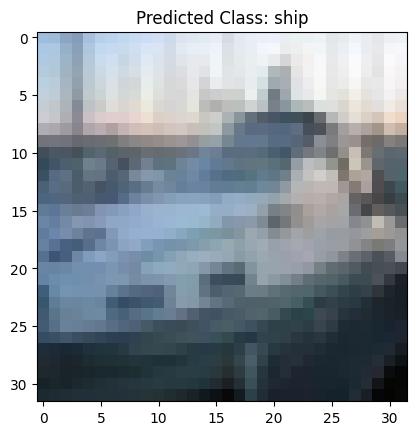

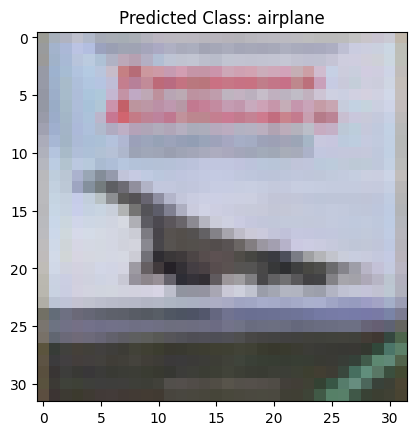

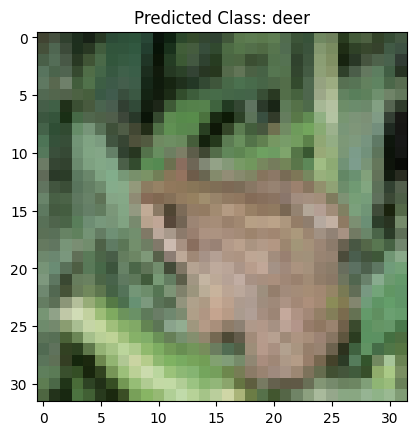

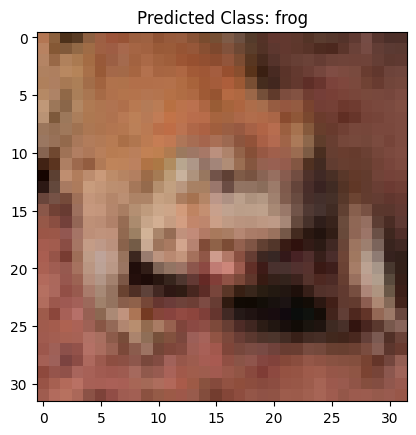

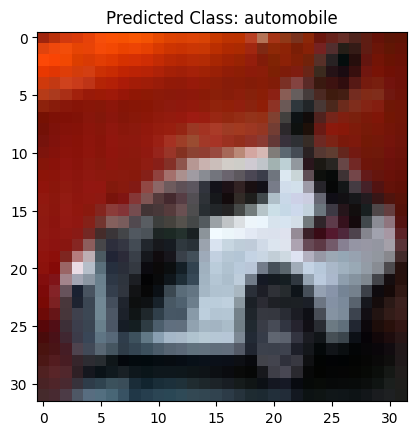

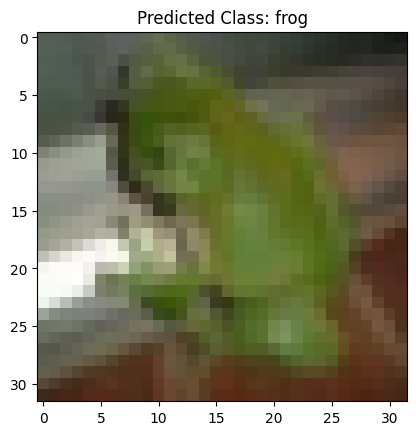

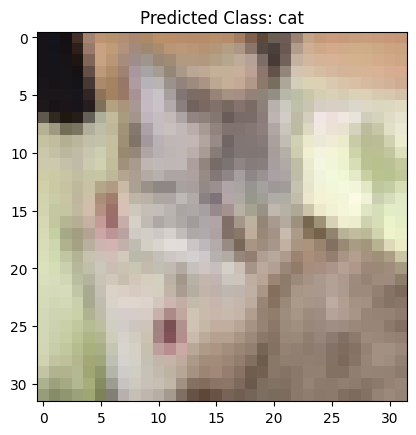

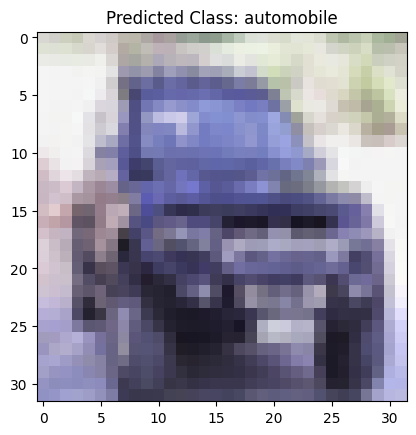

In [3]:
for i in range(10):
  plt.imshow(x_test[i])
  predicted_label=np.argmax(predictions[i])
  class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  plt.title("Predicted Class: "+class_names[predicted_label])
  plt.show()